In [41]:
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('processed/wfp_food_prices_phl.csv')
df = df.iloc[1:,:]
df['date'] = pd.to_datetime(df['date'])
df['price'] = df.price.apply(lambda x: str(x).split('.')[0])
df['price'] = pd.to_numeric(df["price"], downcast="float")
df = df[df.pricetype == 'Retail']
df = df[['date', 'market', 'commodity', 'price']]
df.head()

C:\Users\Marc\.conda\envs\unilab\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (4,5,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,date,market,commodity,price
1,2000-01-15,Metro Manila,Maize flour (yellow),15.0
2,2000-01-15,Metro Manila,"Rice (milled, superior)",20.0
4,2000-01-15,Metro Manila,"Rice (regular, milled)",18.0
6,2000-01-15,Metro Manila,Meat (pork),105.0
7,2000-01-15,Palayan,"Rice (milled, superior)",19.0


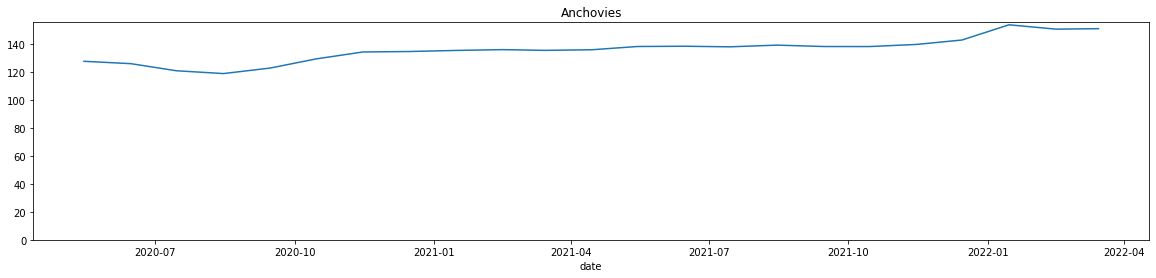

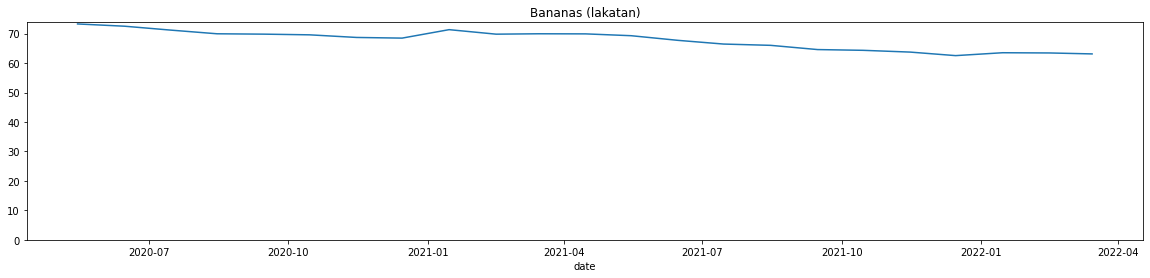

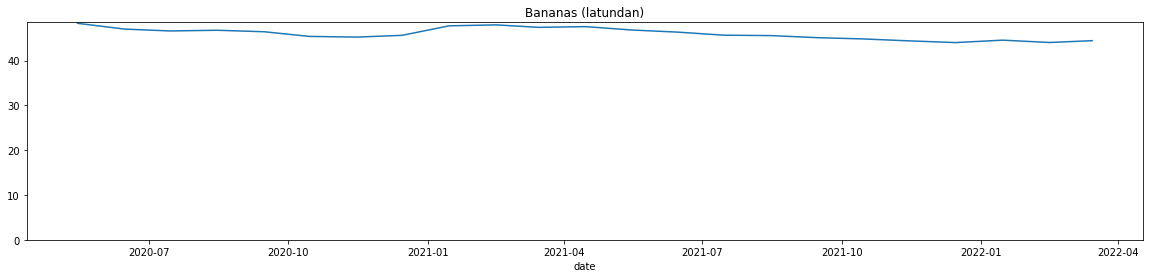

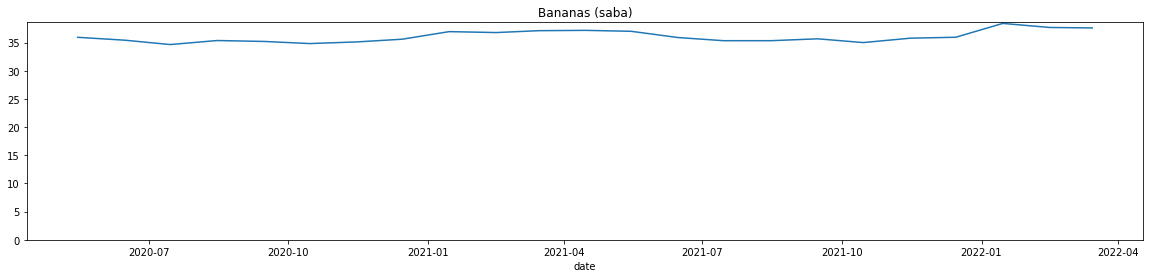

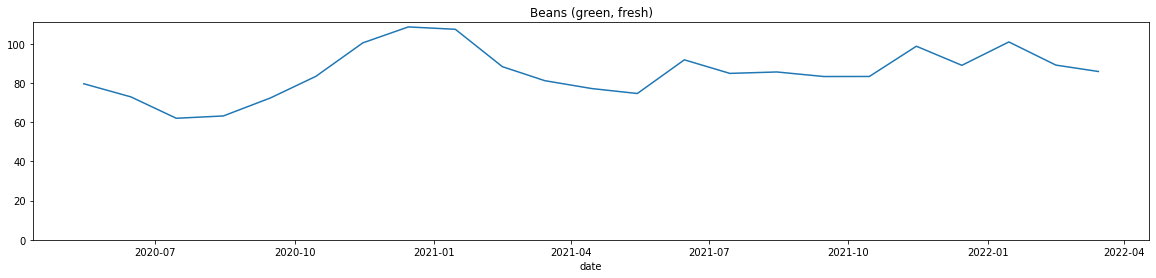

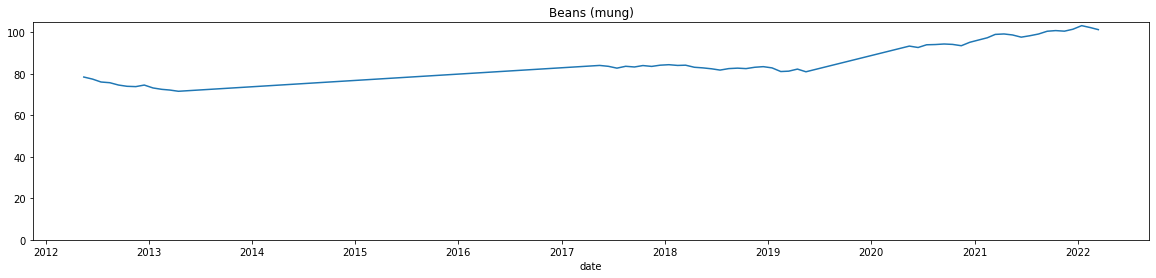

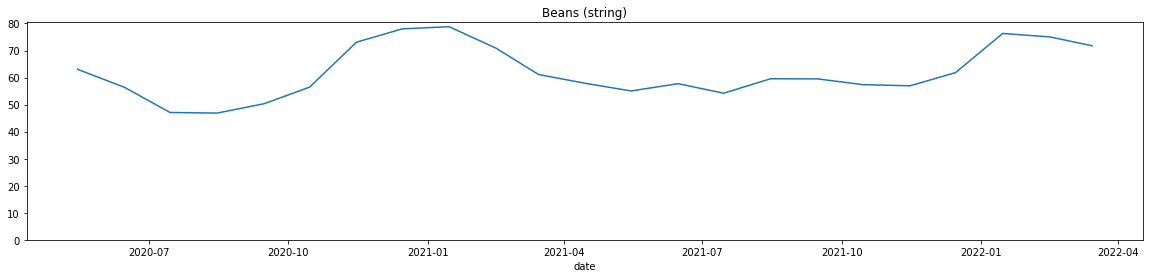

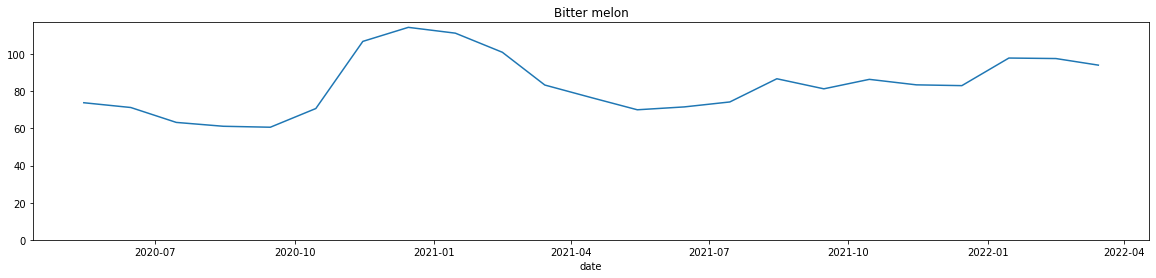

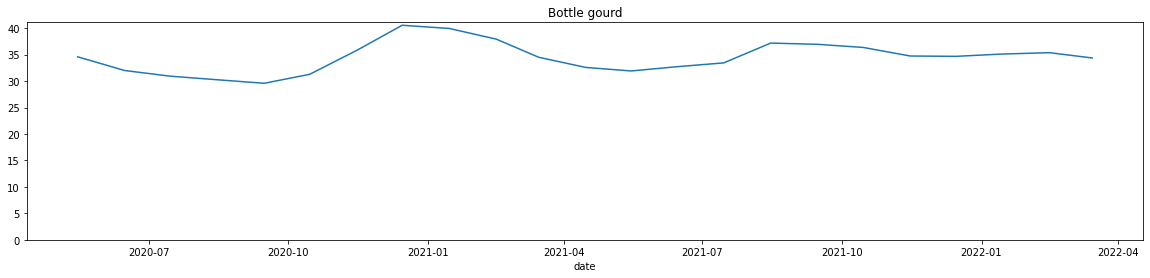

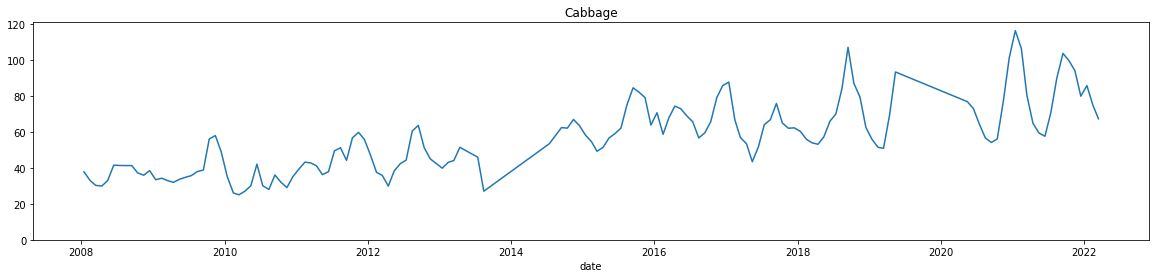

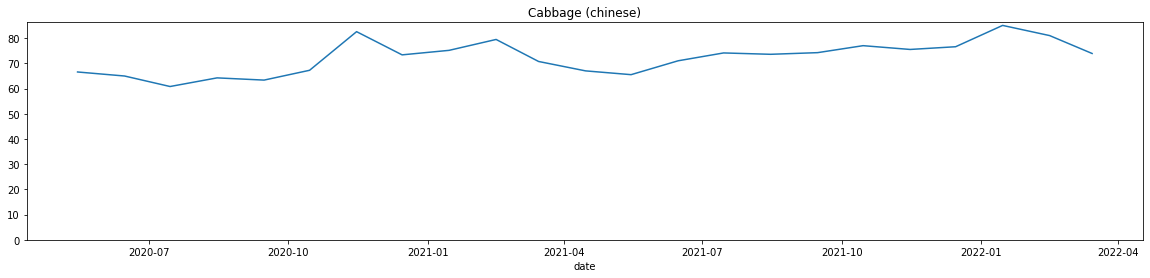

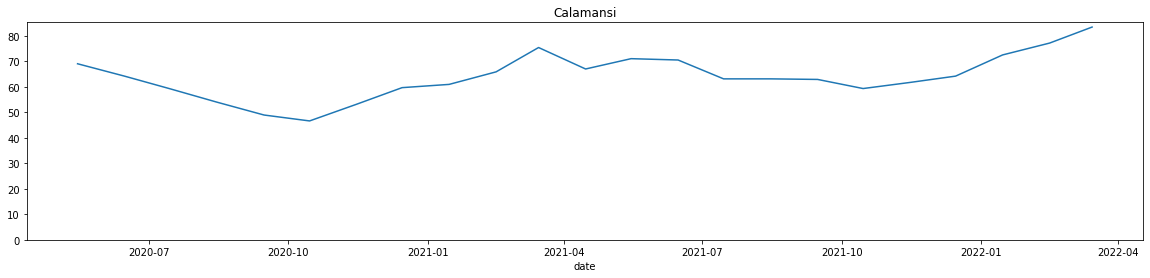

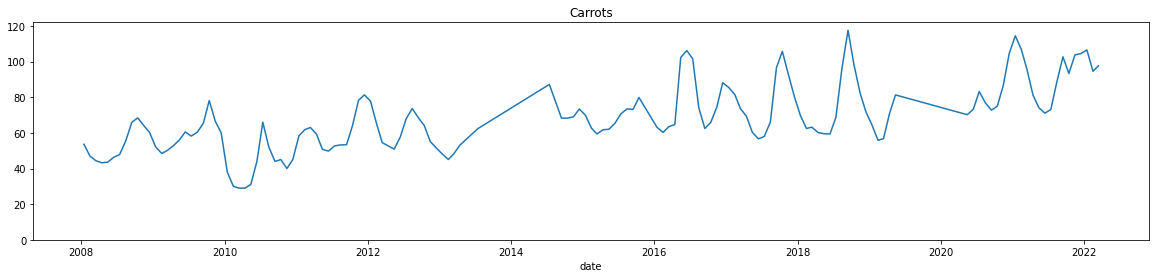

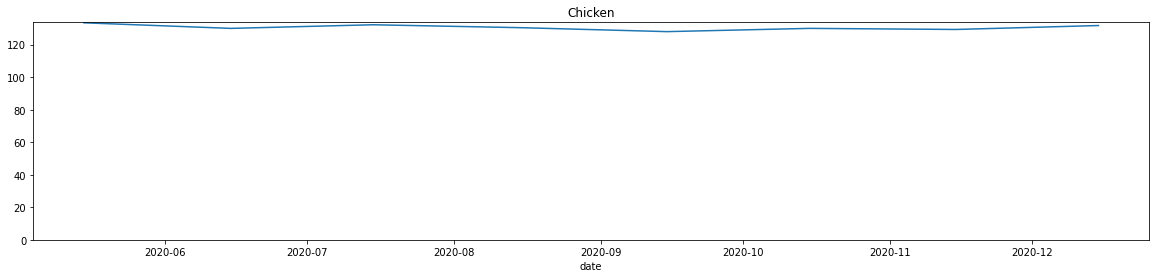

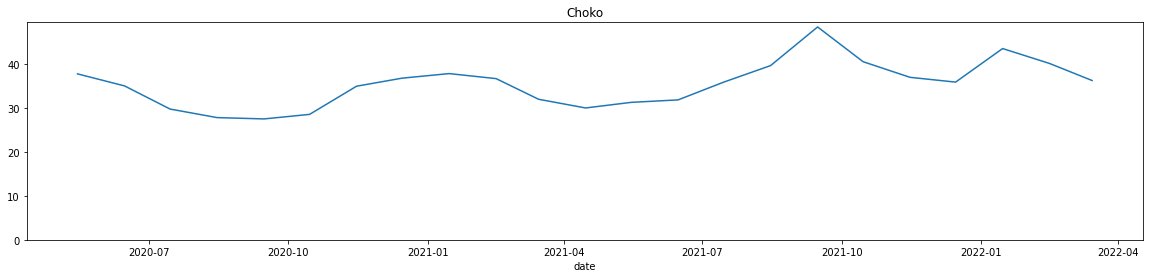

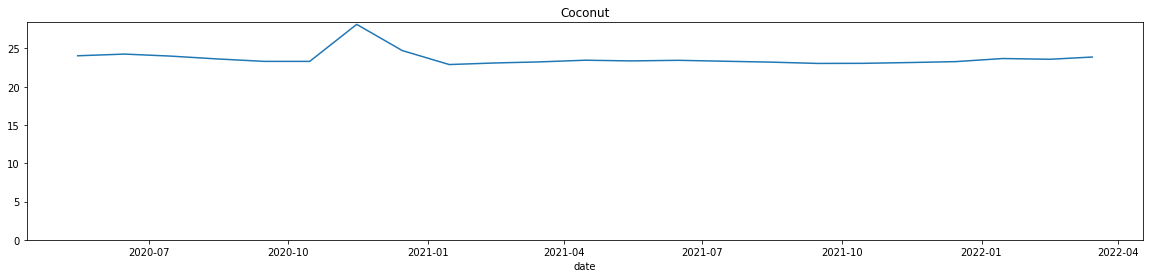

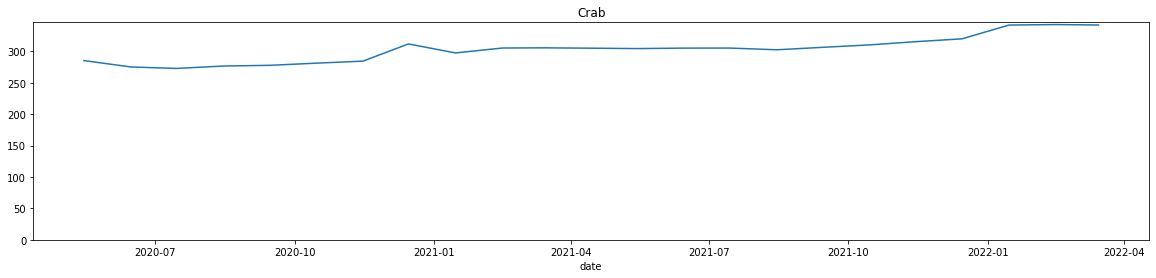

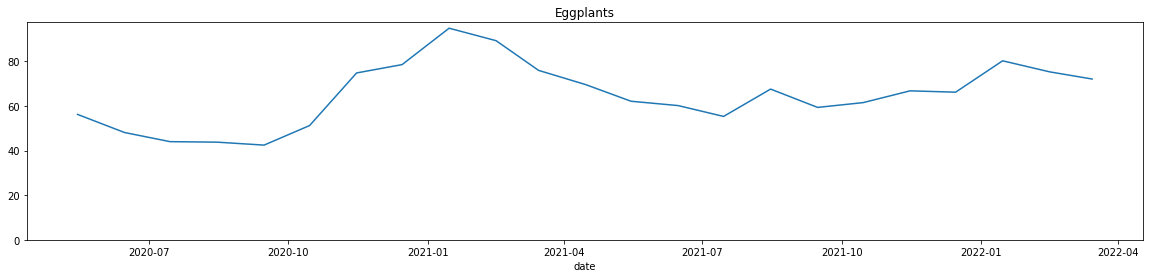

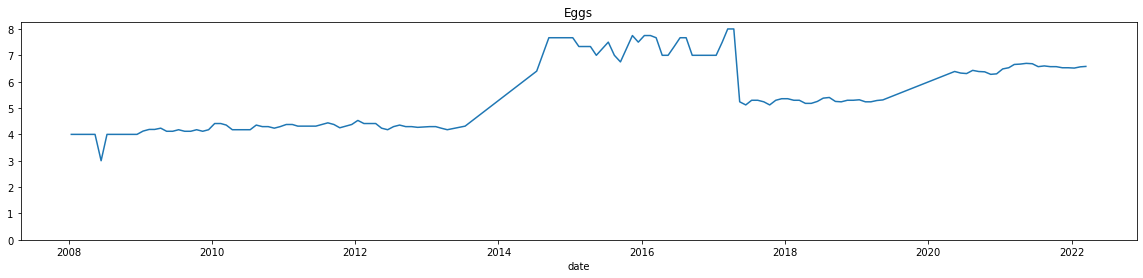

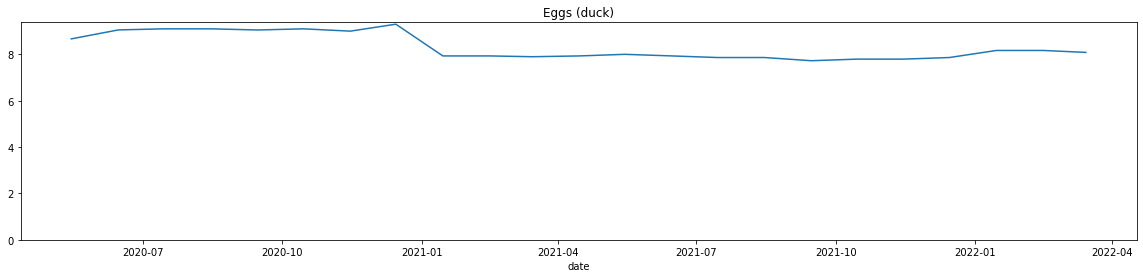

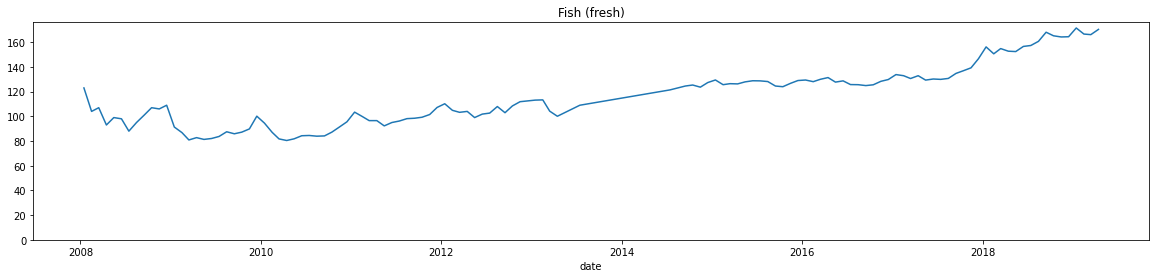

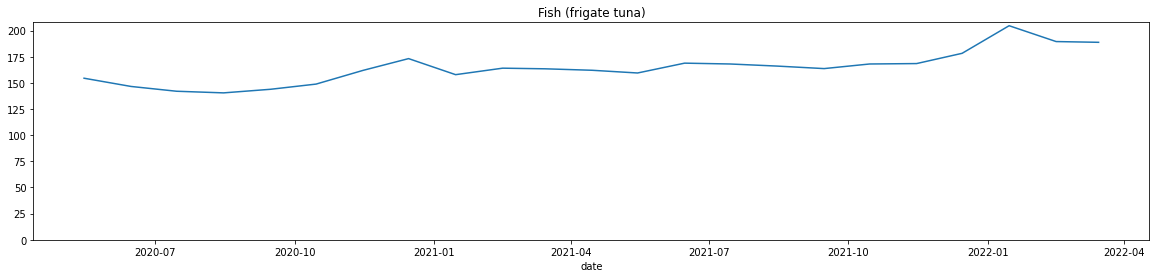

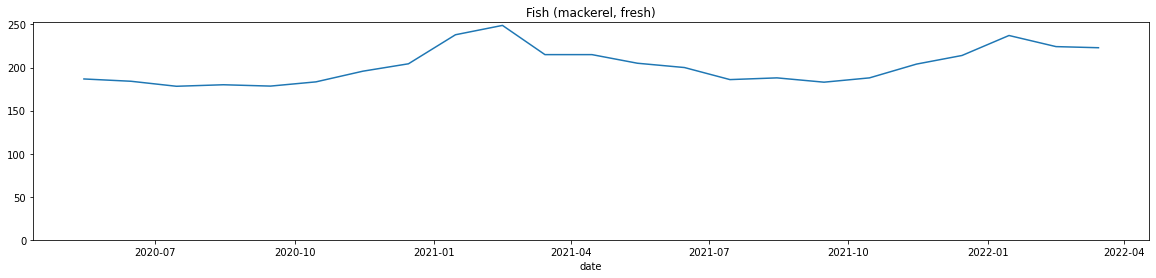

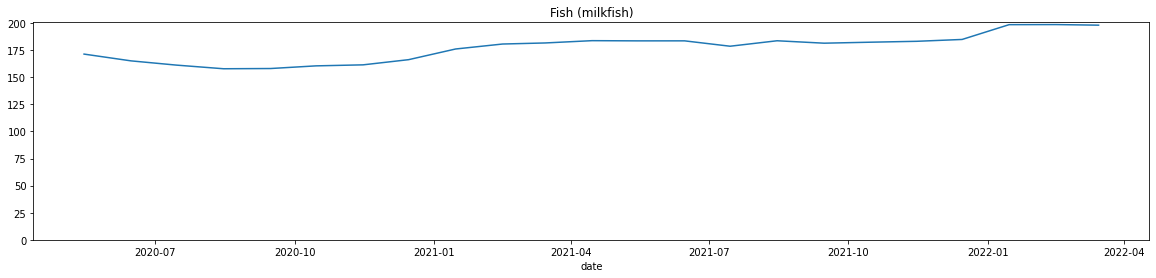

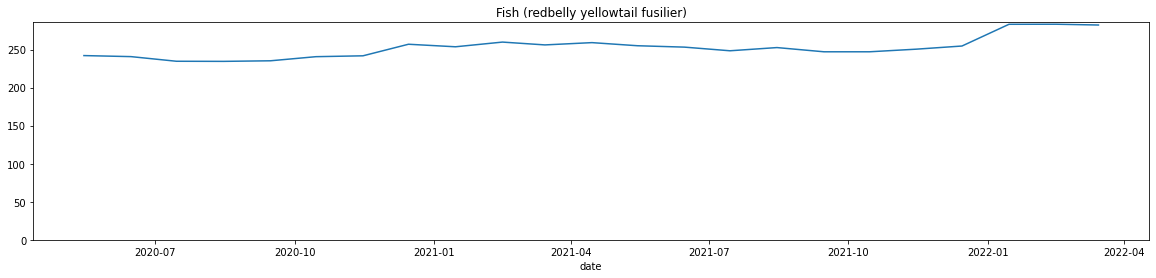

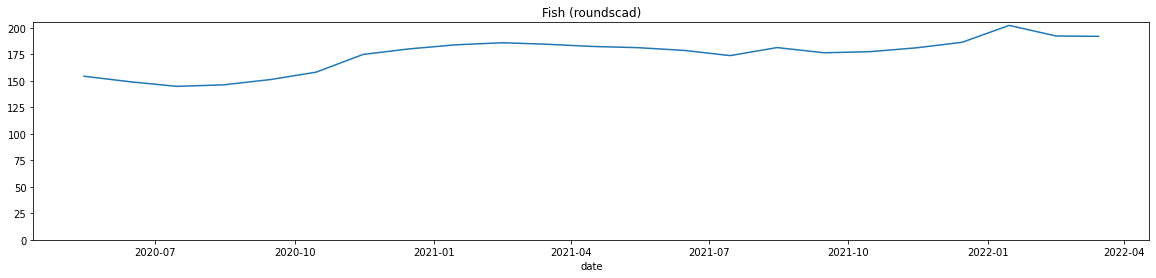

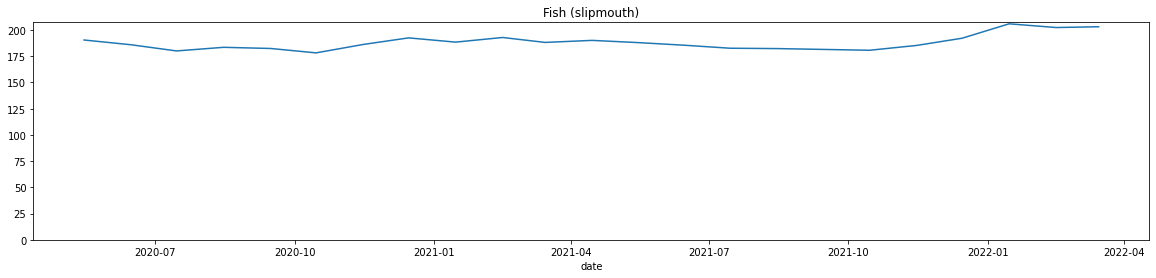

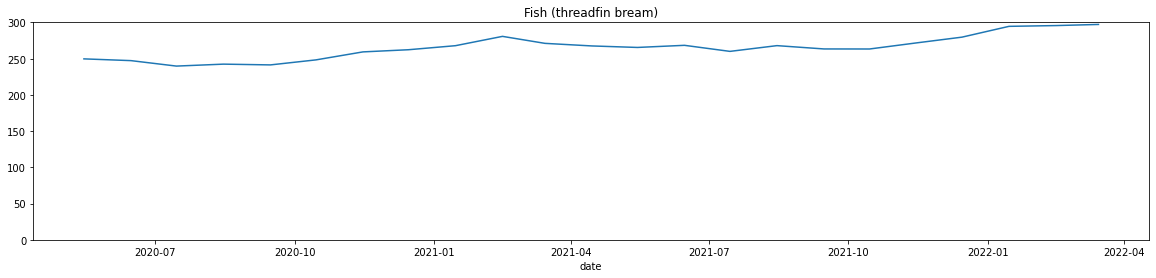

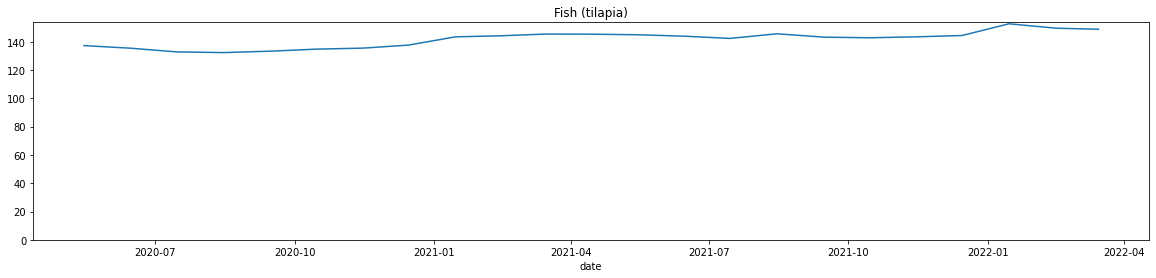

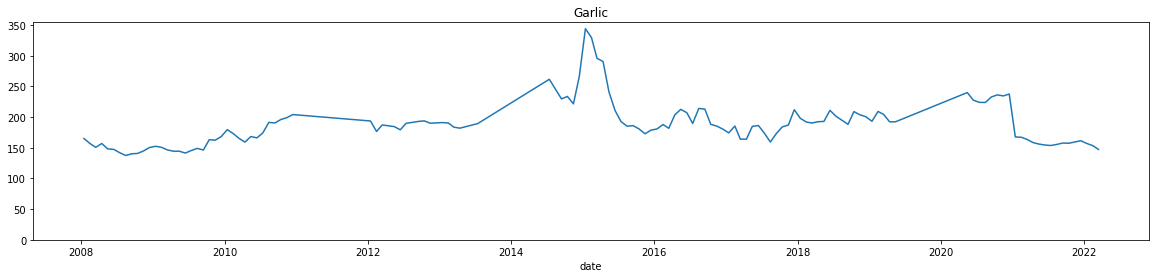

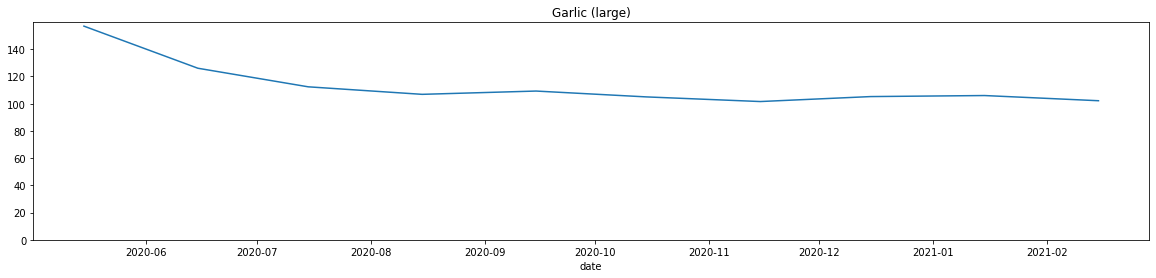

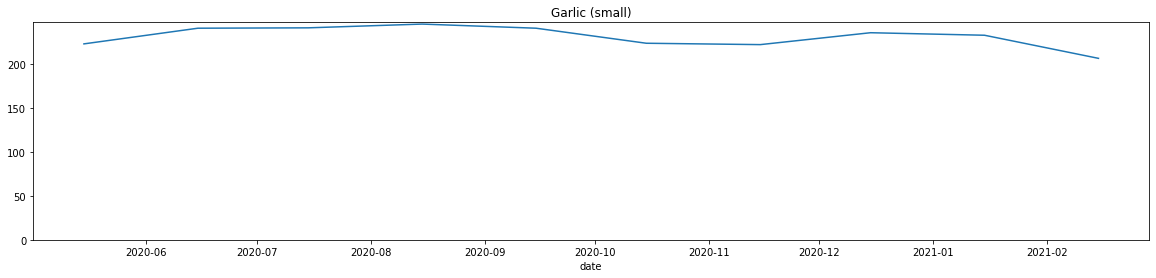

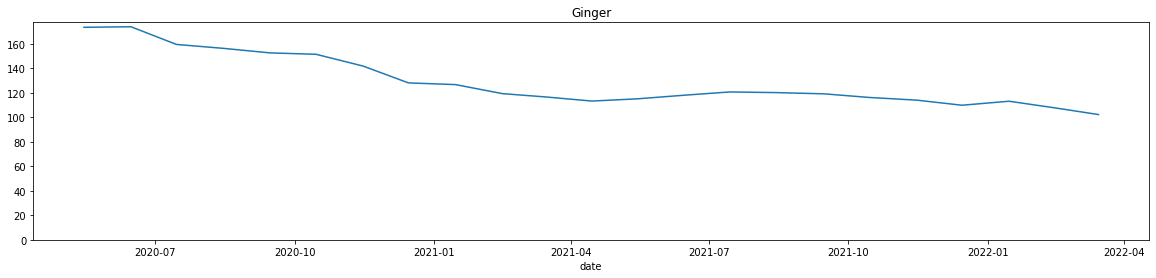

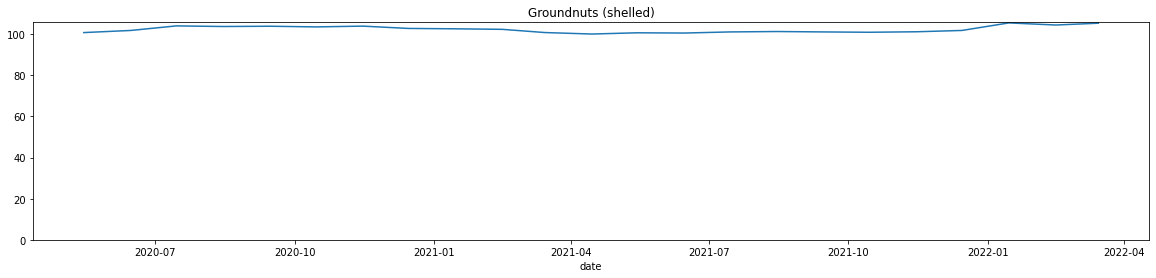

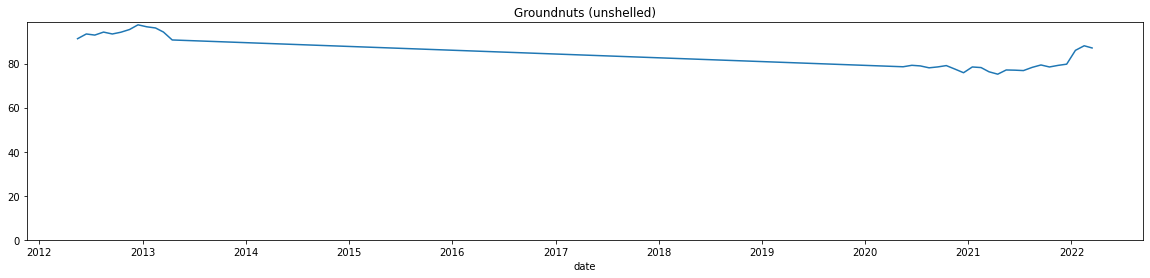

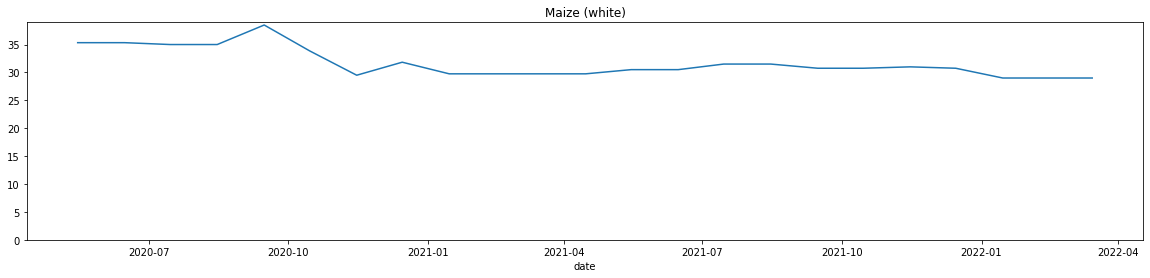

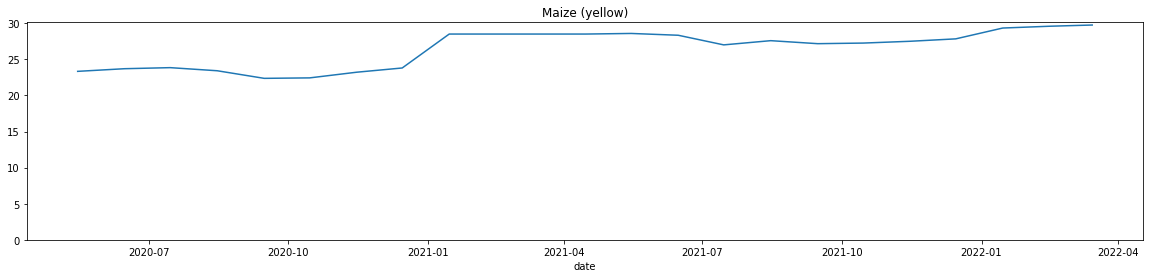

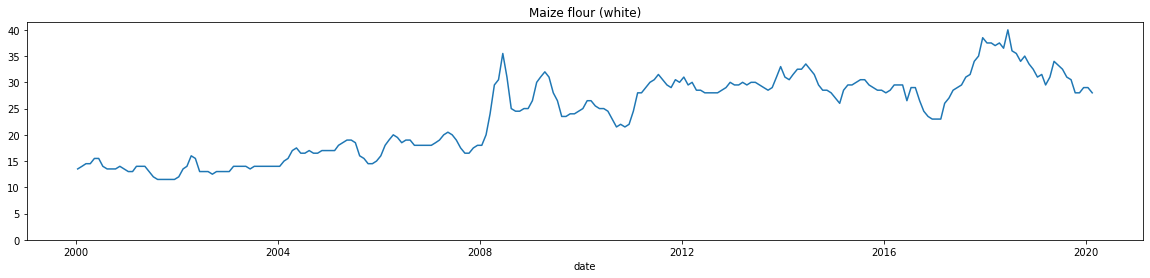

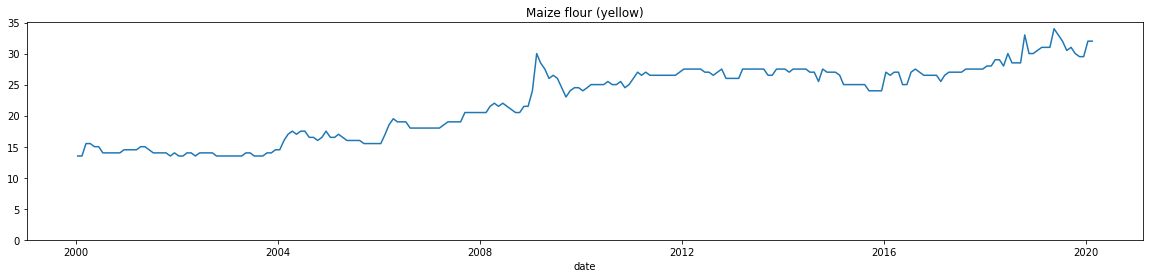

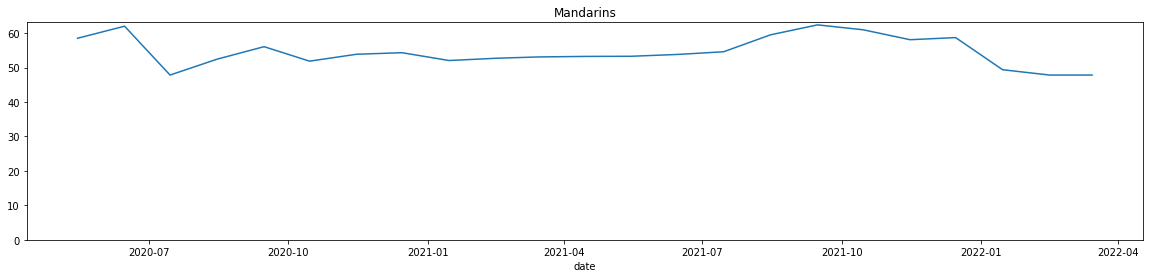

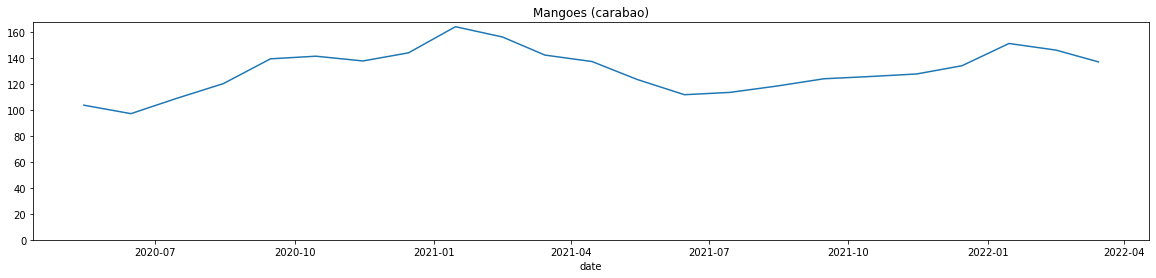

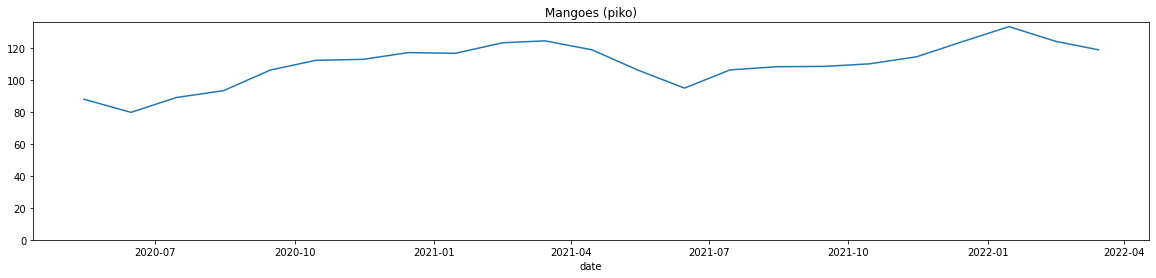

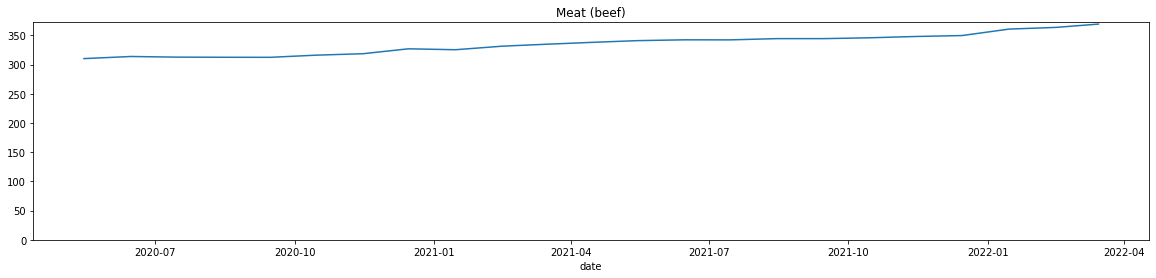

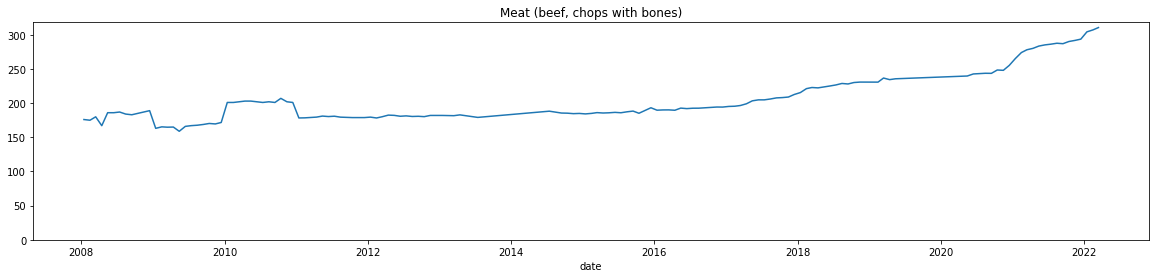

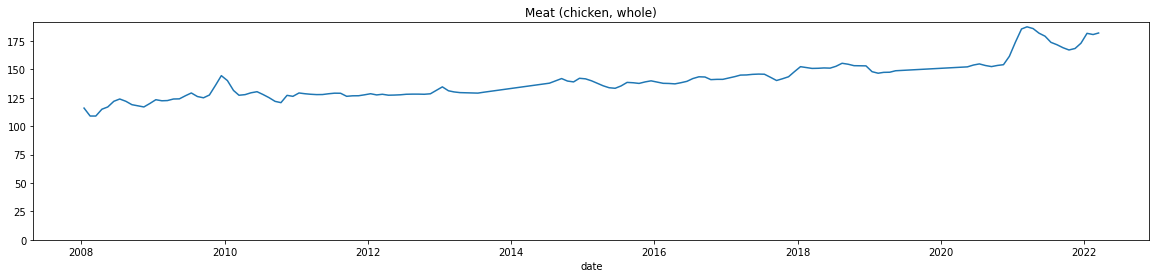

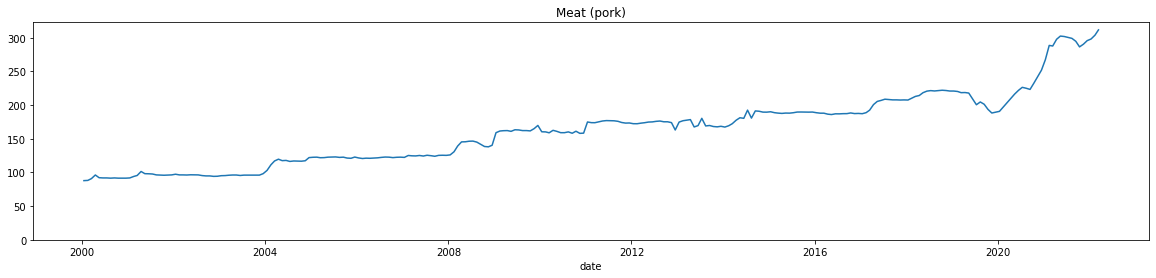

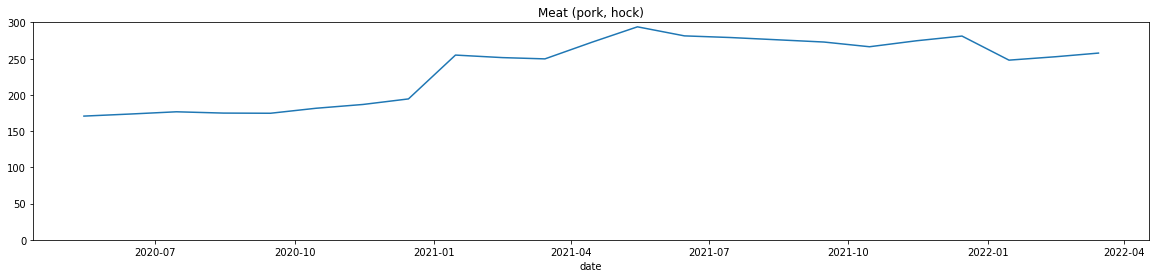

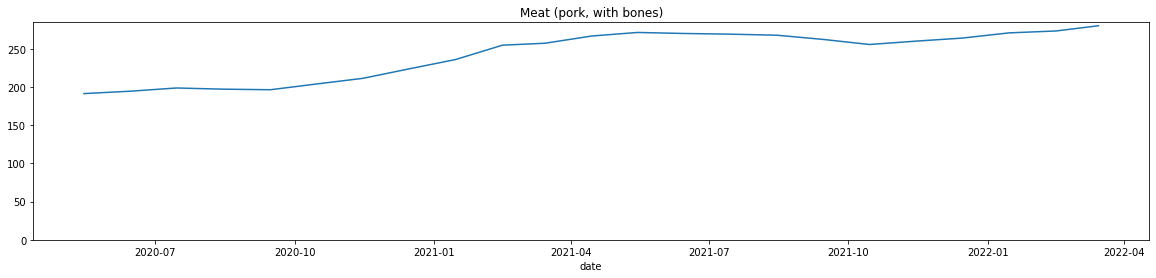

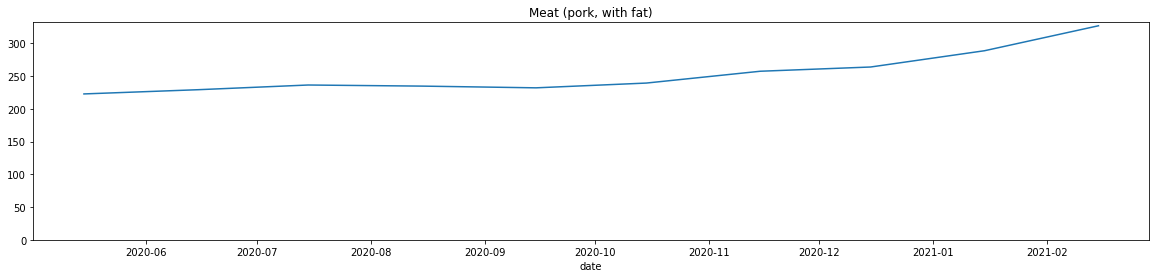

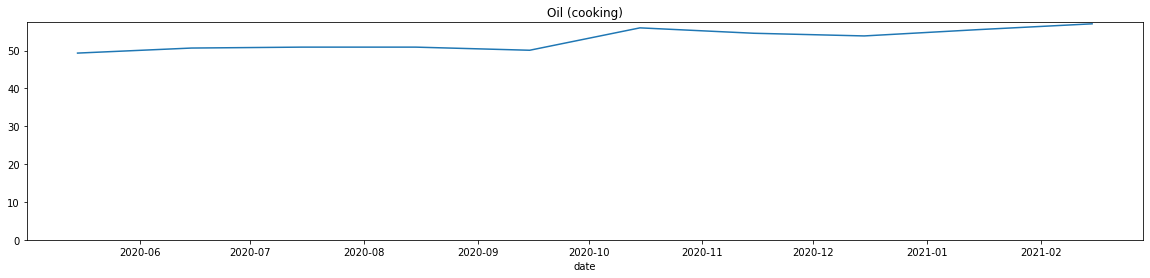

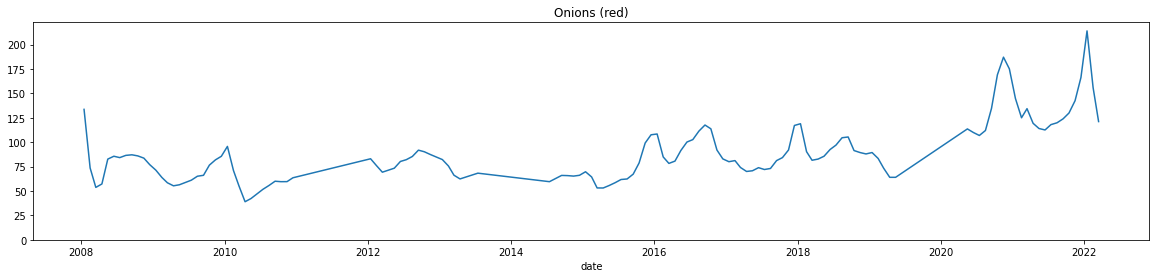

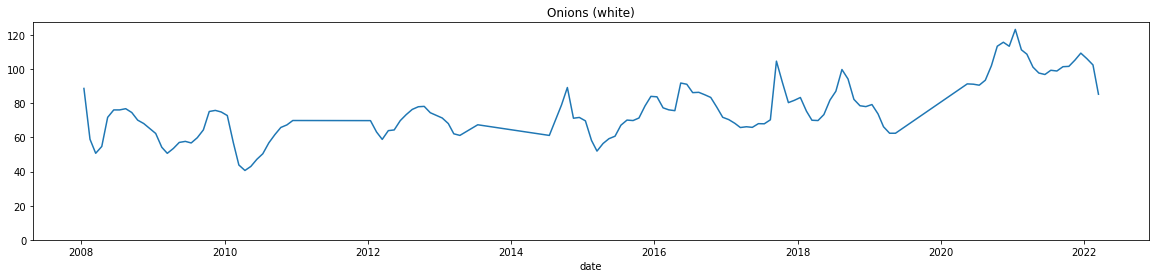

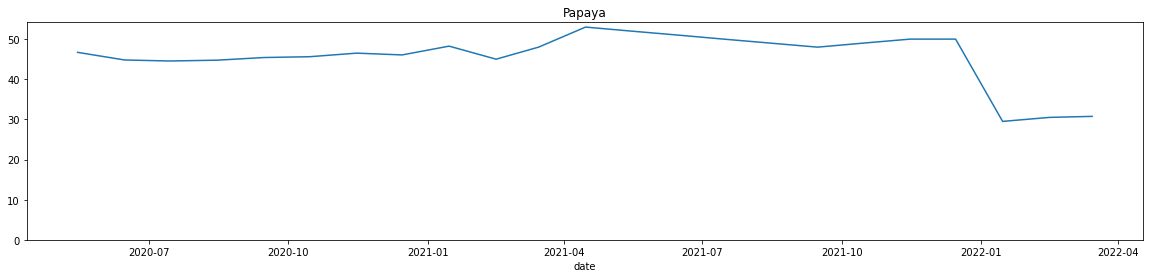

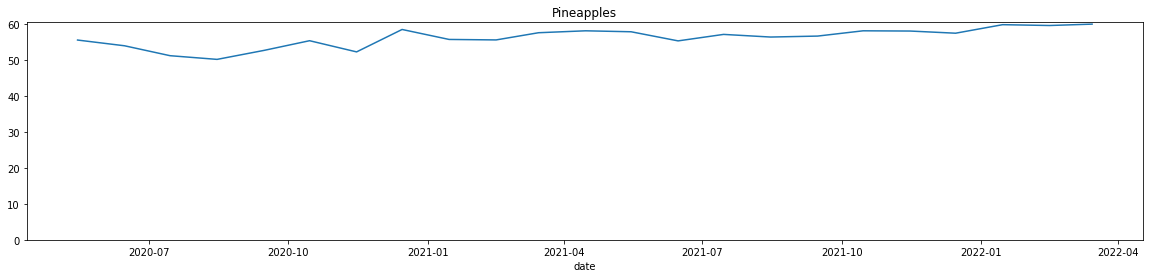

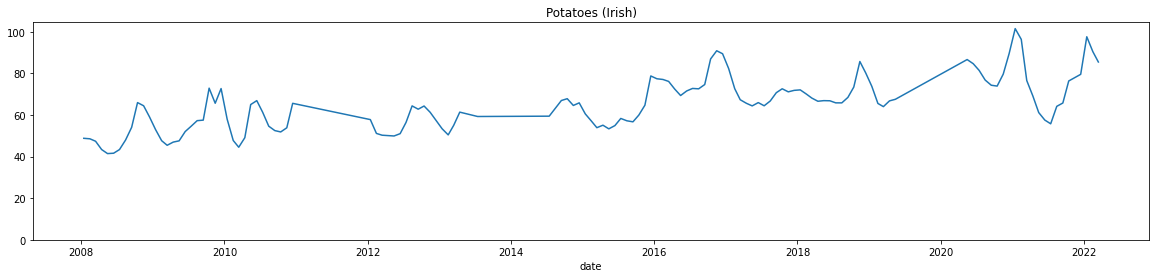

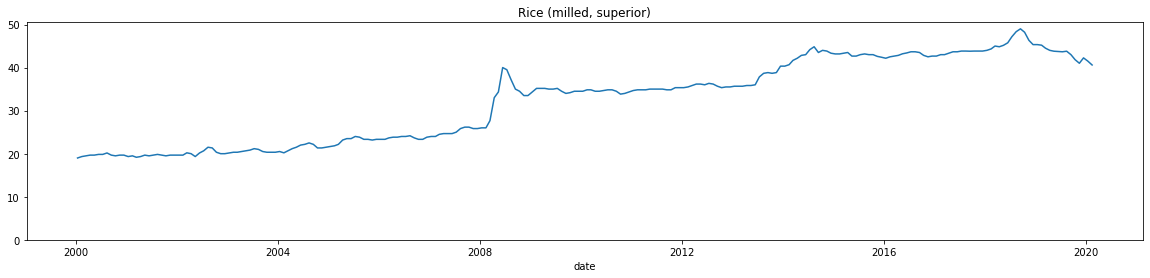

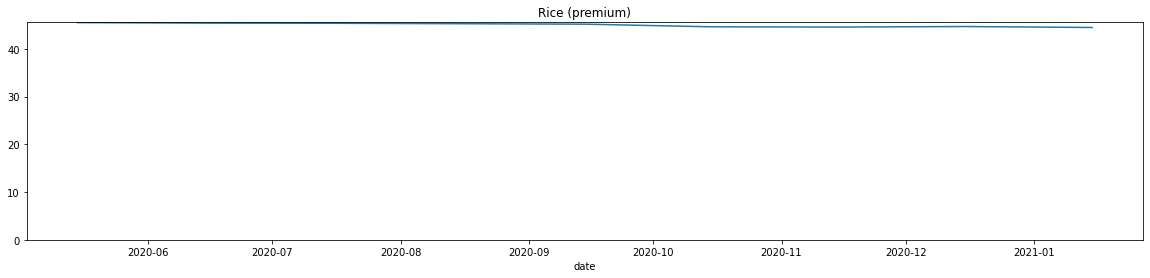

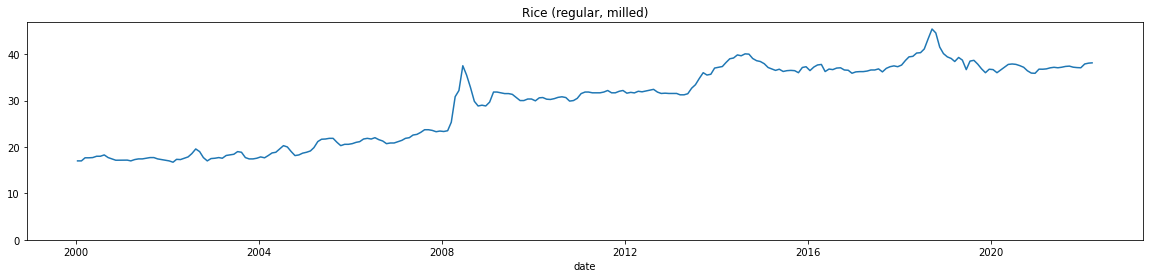

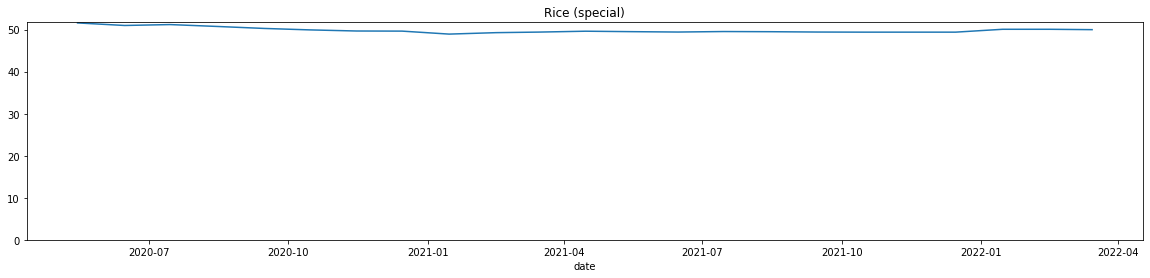

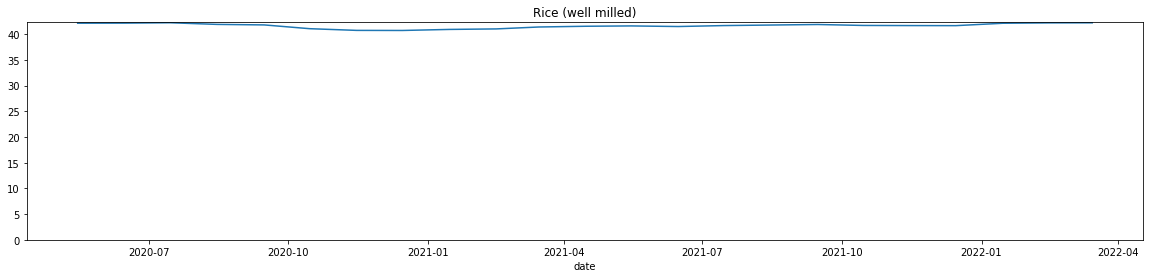

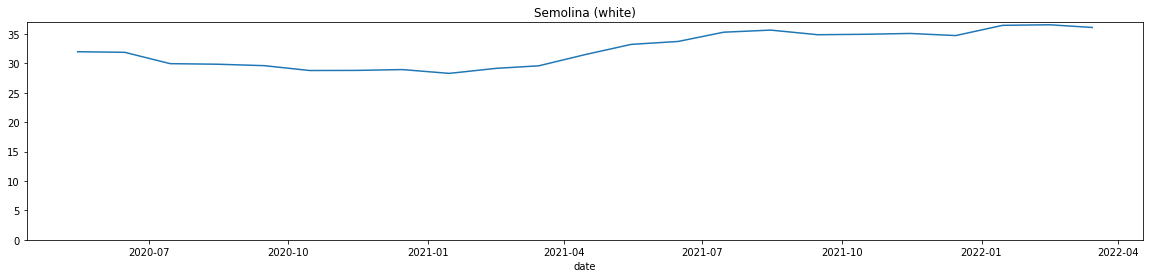

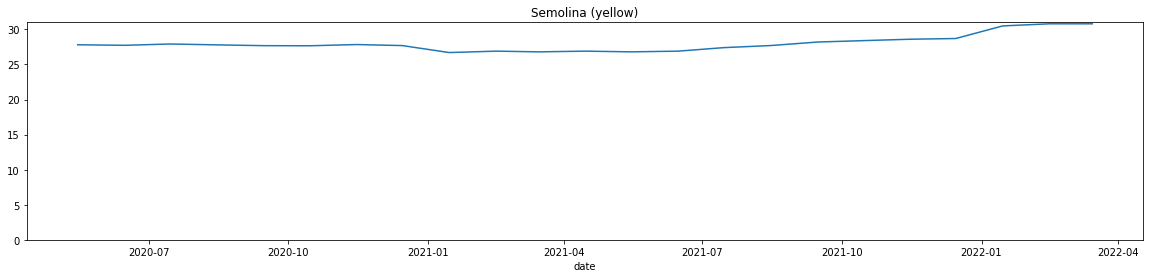

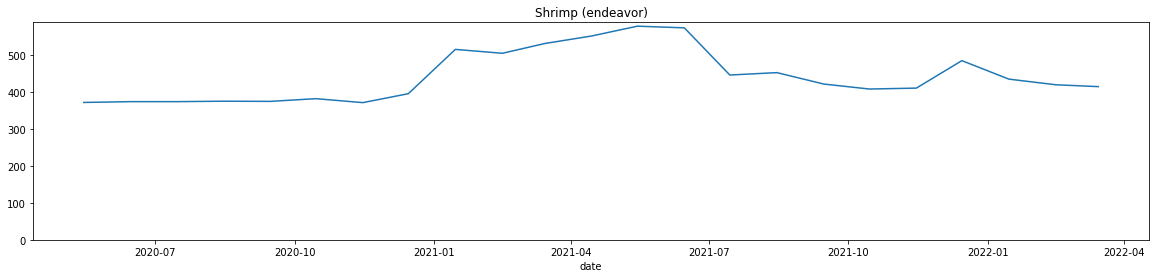

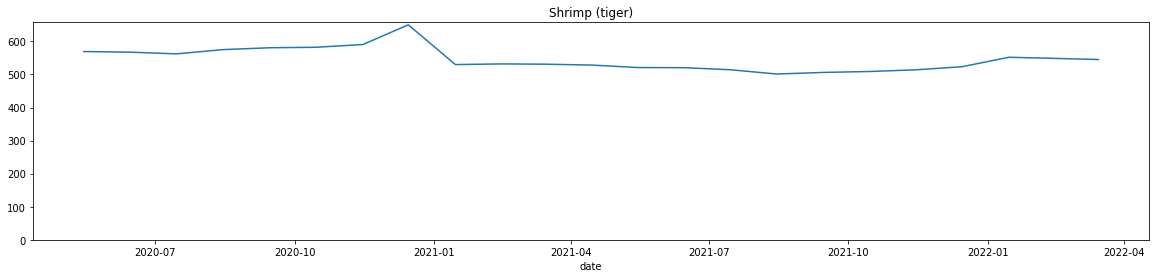

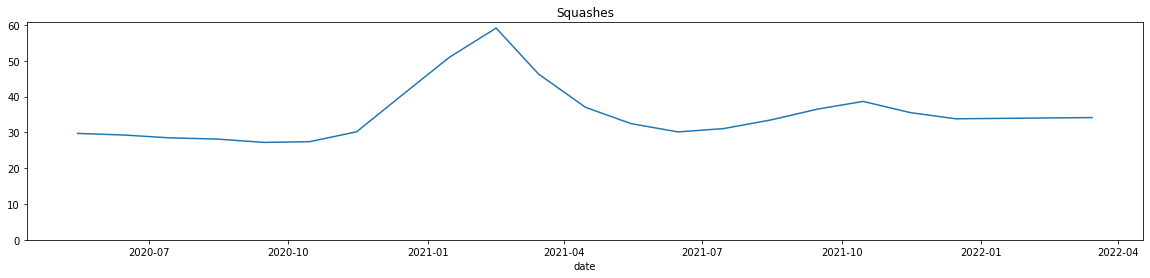

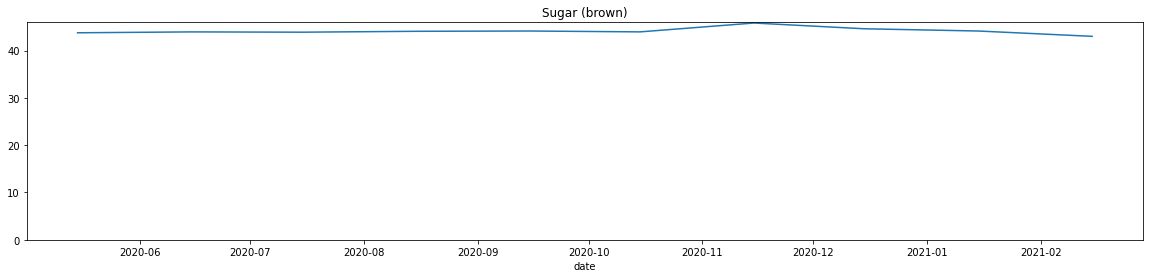

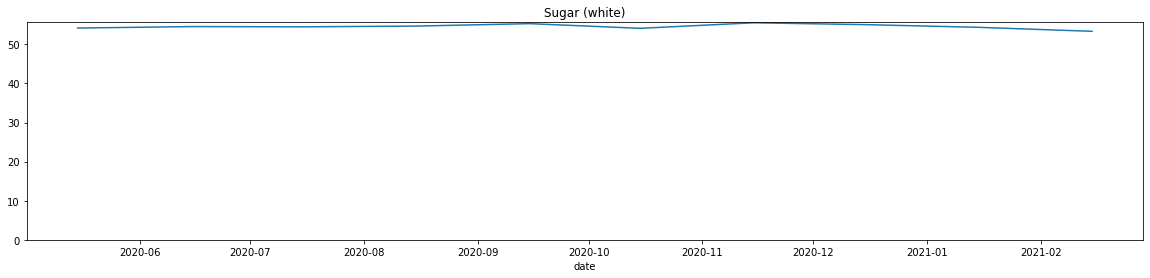

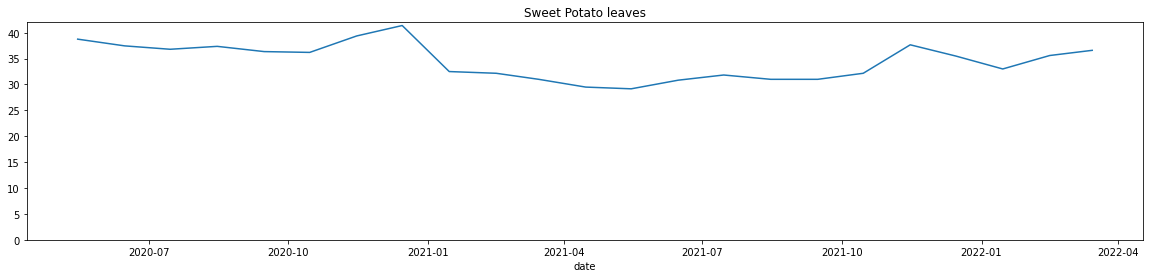

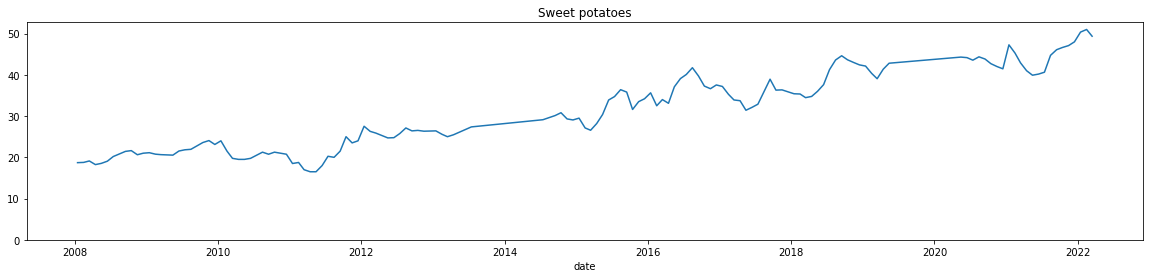

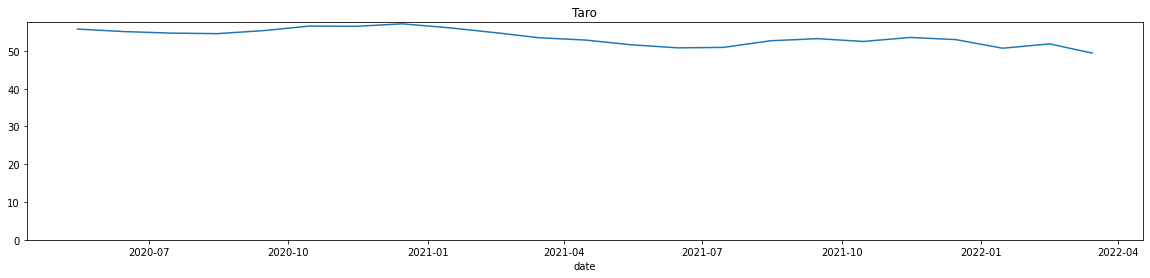

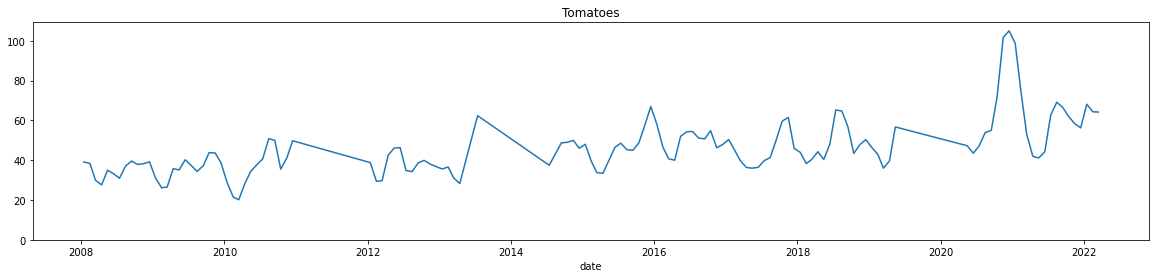

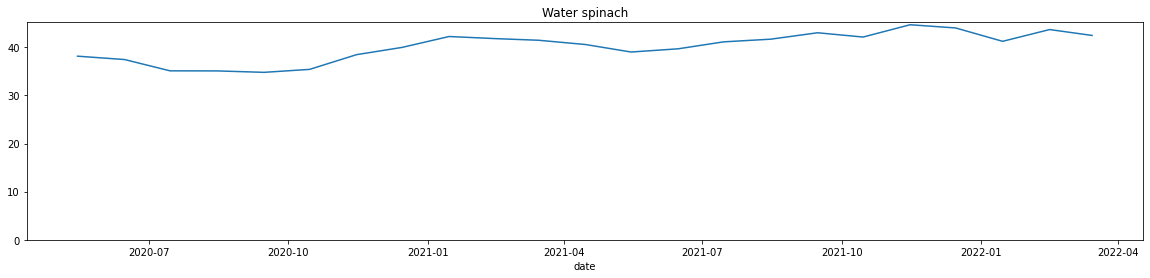

In [43]:
unique_items = sorted(df.commodity.unique().tolist())
for item in unique_items:
    prices = df[df.commodity==item]
    prices.groupby([prices['date'].dt.date]).price.mean().plot(figsize=(20,4))
    plt.title(item)
    plt.ylim(bottom=0)
    plt.show()

In [47]:
df = pd.read_csv('processed/crop_volume_long_form.csv')
df = df[df.Level=='R']
df = df.groupby(['Crop', 'geoloc_quarter'], as_index=False).percent_production.mean()
df['geoloc'] = df.geoloc_quarter.str.split('_').str[0]
df['quarter'] = df.geoloc_quarter.str.split('_').str[1]
del df['geoloc_quarter']
df = df[['Crop', 'geoloc', 'quarter', 'percent_production']]

df_chloro = df.copy()
unique_crop = sorted(df_chloro.Crop.unique().tolist())
#crop_selected = st.selectbox('Select Crop to explore', unique_items, index = 0)
crop_selected = 'Anchovies'
chloro_data = df_chloro[df_chloro.Crop==crop_selected]

df2 = chloro_data[chloro_data.Crop==crop_selected]
df2 = df2.join(psgc.to_frame(name='geometry'), on='geoloc', how='left')
df2 = gpd.GeoDataFrame(df2)

fig, axes = plt.subplots(1, 4, figsize=(20, 10), dpi=240)
for quarter in range(1,5):
    ax = axes[quarter-1]
    quarter = f'Q{quarter}'
    df2[df2.quarter==quarter].plot(column='percent_production', ax=ax, edgecolor='#222', vmin=0, vmax=0.1, cmap='OrRd')
    ax.set_axis_off()
    ax.set_title(quarter, fontsize=20, fontweight='bold')
plt.suptitle(crop, fontsize=24, fontweight='bold')
plt.tight_layout()

NameError: name 'psgc' is not defined